## Imports

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [11]:
cc_data = pd.read_csv('../raw_data/fraudTrain_cleaned.csv', index_col=0)

/Users/chrischung/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [12]:
cc_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,city_pop,job,dob,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,3495,"Psychologist, counselling",1988-03-09,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,149,Special educational needs teacher,1978-06-21,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,4154,Nature conservation officer,1962-01-19,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,1939,Patent attorney,1967-01-12,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,99,Dance movement psychotherapist,1986-03-28,0


In [13]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296569 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296569 non-null  object 
 1   cc_num                 1296569 non-null  int64  
 2   merchant               1296569 non-null  object 
 3   category               1296569 non-null  object 
 4   amt                    1296569 non-null  float64
 5   first                  1296569 non-null  object 
 6   last                   1296569 non-null  object 
 7   gender                 1296569 non-null  object 
 8   street                 1296569 non-null  object 
 9   city                   1296569 non-null  object 
 10  state                  1296569 non-null  object 
 11  zip                    1296569 non-null  int64  
 12  city_pop               1296569 non-null  int64  
 13  job                    1296569 non-null  object 
 14  dob               

In [14]:
#Subset dataset into fraud and valid datasets
cc_data_fraud = cc_data[cc_data['is_fraud']==1]
cc_data_valid = cc_data[cc_data['is_fraud']==0]

In [15]:
#Examine fraud data
cc_data_fraud.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,city_pop,job,dob,is_fraud
2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,885,Soil scientist,1988-09-15,1
2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,1595797,Horticultural consultant,1960-10-28,1
2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,1595797,Horticultural consultant,1960-10-28,1
2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,885,Soil scientist,1988-09-15,1
2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,1595797,Horticultural consultant,1960-10-28,1


In [16]:
cc_data_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7506 entries, 2449 to 1295733
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  7506 non-null   object 
 1   cc_num                 7506 non-null   int64  
 2   merchant               7506 non-null   object 
 3   category               7506 non-null   object 
 4   amt                    7506 non-null   float64
 5   first                  7506 non-null   object 
 6   last                   7506 non-null   object 
 7   gender                 7506 non-null   object 
 8   street                 7506 non-null   object 
 9   city                   7506 non-null   object 
 10  state                  7506 non-null   object 
 11  zip                    7506 non-null   int64  
 12  city_pop               7506 non-null   int64  
 13  job                    7506 non-null   object 
 14  dob                    7506 non-null   object 
 15

In [17]:
#Examine valid transactions
cc_data_valid.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,city_pop,job,dob,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,3495,"Psychologist, counselling",1988-03-09,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,149,Special educational needs teacher,1978-06-21,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,4154,Nature conservation officer,1962-01-19,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,1939,Patent attorney,1967-01-12,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,99,Dance movement psychotherapist,1986-03-28,0


In [18]:
cc_data_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1289063 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1289063 non-null  object 
 1   cc_num                 1289063 non-null  int64  
 2   merchant               1289063 non-null  object 
 3   category               1289063 non-null  object 
 4   amt                    1289063 non-null  float64
 5   first                  1289063 non-null  object 
 6   last                   1289063 non-null  object 
 7   gender                 1289063 non-null  object 
 8   street                 1289063 non-null  object 
 9   city                   1289063 non-null  object 
 10  state                  1289063 non-null  object 
 11  zip                    1289063 non-null  int64  
 12  city_pop               1289063 non-null  int64  
 13  job                    1289063 non-null  object 
 14  dob               

## Visualizations of continuous variable columns for fraud vs. valid

(array([1786.,  290., 1689.,  144.,  172.,  896., 1241.,  989.,  273.,
          26.]),
 array([1.060000e+00, 1.385580e+02, 2.760560e+02, 4.135540e+02,
        5.510520e+02, 6.885500e+02, 8.260480e+02, 9.635460e+02,
        1.101044e+03, 1.238542e+03, 1.376040e+03]),
 [<matplotlib.patches.Polygon at 0x7fab85107bb0>])

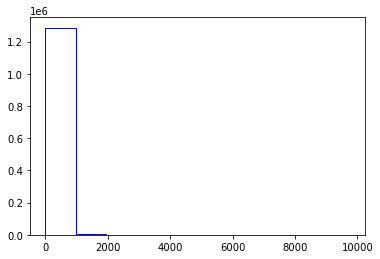

In [27]:
#Histogram of 'amt' column
plt.hist(cc_data_valid['amt'], color = 'blue', histtype='step')
plt.hist(cc_data_fraud['amt'], color = 'red', histtype='step')

#Are histograms an effective way to visualize this column due to the unbalanced nature of fraud vs valid?

Text(0, 0.5, 'Amount')

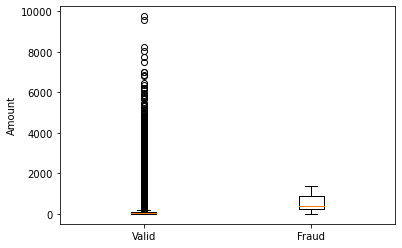

In [39]:
#Boxplots of 'amt' column
plt.boxplot([cc_data_valid['amt'], cc_data_fraud['amt']])
plt.xticks([1, 2], ['Valid', 'Fraud'])
plt.ylabel('Amount')

#Should we remove more outliers from the valid dataset?

(array([6924.,  200.,  145.,   62.,   63.,   54.,    0.,    0.,   19.,
          39.]),
 array([2.3000000e+01, 2.9069070e+05, 5.8135840e+05, 8.7202610e+05,
        1.1626938e+06, 1.4533615e+06, 1.7440292e+06, 2.0346969e+06,
        2.3253646e+06, 2.6160323e+06, 2.9067000e+06]),
 [<matplotlib.patches.Polygon at 0x7fab131af910>])

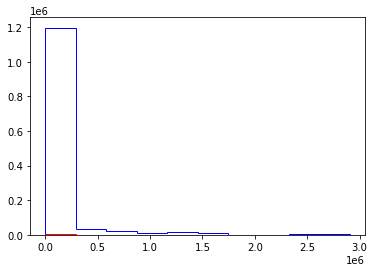

In [42]:
# Histogram of 'city_pop' column
plt.hist(cc_data_valid['city_pop'], color = 'blue', histtype='step')
plt.hist(cc_data_fraud['city_pop'], color = 'red', histtype='step')

Text(0, 0.5, 'City Population')

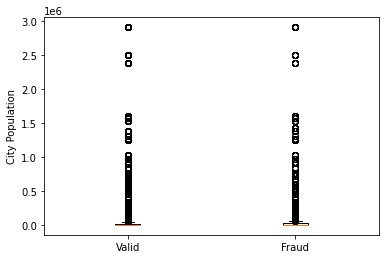

In [43]:
#Boxplot of 'city_pop' column
#Boxplots of 'amt' column
plt.boxplot([cc_data_valid['city_pop'], cc_data_fraud['city_pop']])
plt.xticks([1, 2], ['Valid', 'Fraud'])
plt.ylabel('City Population')

## Examine visualizations of categorical variables

#### Does the transaction category affect our target variable?

Text(0.5, 1.0, 'Bar Graph of Transaction Categories')

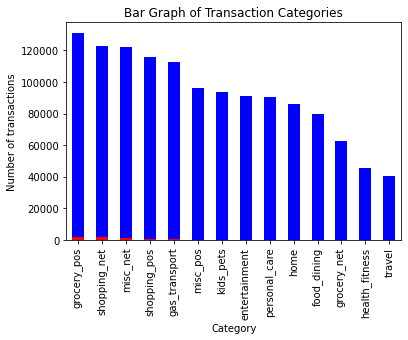

In [46]:
# Category column
cc_data_valid['category'].value_counts().plot(kind='bar', color = 'blue')
cc_data_fraud['category'].value_counts().plot(kind='bar', color = 'red')
plt.xlabel('Category')
plt.ylabel('Number of transactions')
plt.title('Bar Graph of Transaction Categories')

<ipython-input-56-93d0822a70cb>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cc_data_fraud['category'].value_counts().index, rotation = 90)


[Text(0, 0, 'grocery_pos'),
 Text(1, 0, 'shopping_net'),
 Text(2, 0, 'misc_net'),
 Text(3, 0, 'shopping_pos'),
 Text(4, 0, 'gas_transport'),
 Text(5, 0, 'misc_pos'),
 Text(6, 0, 'kids_pets'),
 Text(7, 0, 'entertainment'),
 Text(8, 0, 'personal_care'),
 Text(9, 0, 'home'),
 Text(10, 0, 'food_dining'),
 Text(11, 0, 'grocery_net'),
 Text(12, 0, 'health_fitness'),
 Text(13, 0, 'travel')]

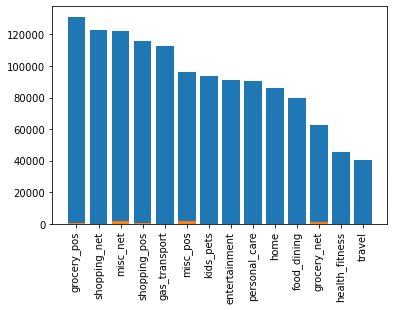

In [56]:
fig, ax = plt.subplots()
b1 = ax.bar(cc_data_valid['category'].value_counts().index, cc_data_valid['category'].value_counts())
b2 = ax.bar(cc_data_fraud['category'].value_counts().index, cc_data_fraud['category'].value_counts())
ax.set_xticklabels(cc_data_fraud['category'].value_counts().index, rotation = 90)

Text(0.5, 1.0, 'Bar Graph of VALID Transaction Categories')

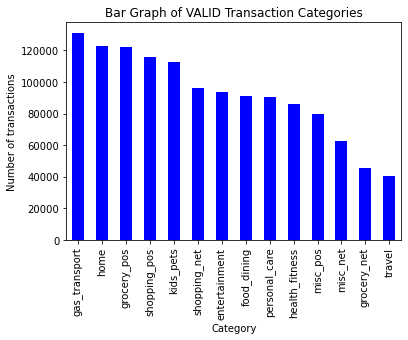

In [47]:
cc_data_valid['category'].value_counts().plot(kind='bar', color = 'blue')
plt.xlabel('Category')
plt.ylabel('Number of transactions')
plt.title('Bar Graph of VALID Transaction Categories')

Text(0.5, 1.0, 'Bar Graph of FRAUD Transaction Categories')

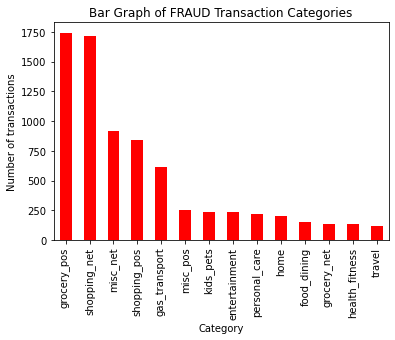

In [49]:
cc_data_fraud['category'].value_counts().plot(kind='bar', color = 'red')
plt.xlabel('Category')
plt.ylabel('Number of transactions')
plt.title('Bar Graph of FRAUD Transaction Categories')

### Does state affect target variable?